<a href="https://colab.research.google.com/github/Kalyanasundaram12/Housing-price-prediction/blob/main/DSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pickle
import pandas as pd
import sklearn as skl
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn import decomposition

In [ ]:
df = pd.read_csv("gdrive/MyDrive/Colab Notebooks/housing.csv")

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.dropna(subset=[cols for cols in df.columns], inplace=True)

In [ ]:
df.shape

(20433, 10)

In [ ]:
corr_df = df.drop(['latitude', 'longitude', 'ocean_proximity'], axis=1)

In [ ]:
corr_df.head

<bound method NDFrame.head of        housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  median_house_value  
0           126.0         8.3252            452600.0  
1          1138.0  

In [ ]:
corr_df.corrwith(df['median_house_value'])

housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
dtype: float64

In [ ]:
X = df.drop(['median_house_value'], axis=1)
Y = df['median_house_value']
type(Y)

pandas.core.series.Series

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60c8d57670>]],
      dtype=object)

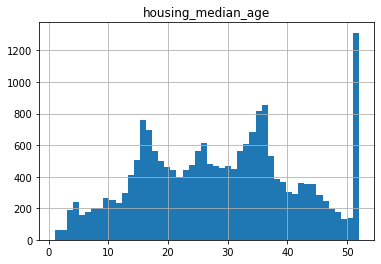

In [ ]:
df.hist(column='housing_median_age', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60c8c37af0>]],
      dtype=object)

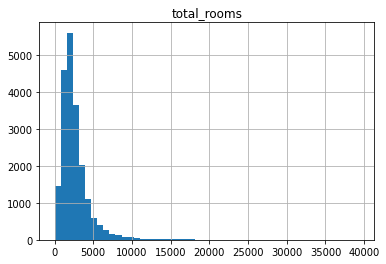

In [ ]:
df.hist(column='total_rooms', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60dd248ac0>]],
      dtype=object)

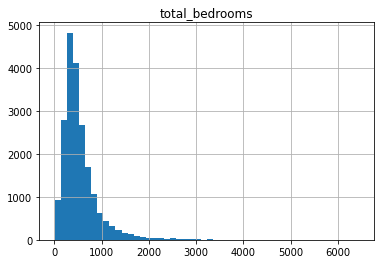

In [ ]:
df.hist(column='total_bedrooms', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60c8638b50>]],
      dtype=object)

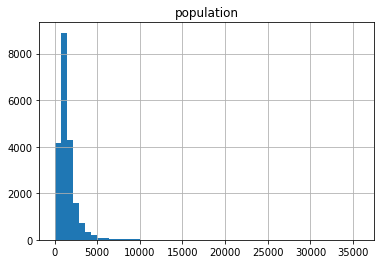

In [ ]:
df.hist(column='population', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60c8555f40>]],
      dtype=object)

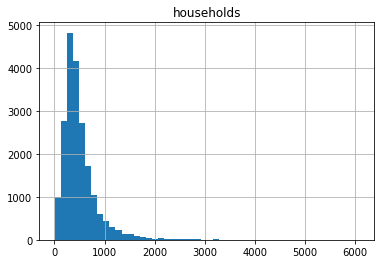

In [ ]:
df.hist(column='households', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60c844eb80>]],
      dtype=object)

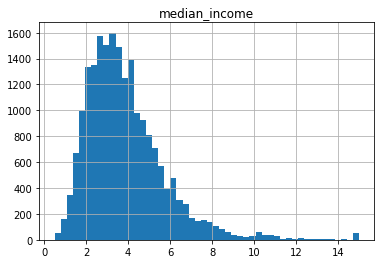

In [ ]:
df.hist(column='median_income', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60c8399c40>]],
      dtype=object)

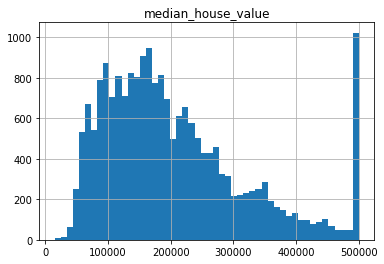

In [ ]:
df.hist(column='median_house_value', bins=50)

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df = pd.get_dummies(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [ ]:
X = df.drop(['median_house_value'], axis=1)
Y = df['median_house_value']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

In [ ]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()

In [ ]:
X_train = scaler1.fit_transform(X_train)
Y_train = scaler2.fit_transform(Y_train)

In [ ]:
X_test = scaler1.transform(X_test)
Y_test = scaler2.transform(Y_test)

In [ ]:
X_test

array([[ 0.81022057, -0.73182997,  0.67009274, -0.59069161, -0.6682074 ,
        -0.43501222, -0.60331714, -0.3510154 , -0.10192221],
       [ 0.86019204, -0.87243763, -0.43886625,  1.55572824,  1.60984084,
         2.00591807,  1.73385021,  0.08998474,  0.22769837],
       [-1.08369831,  0.54301284, -0.99334574,  0.57185426,  0.20053981,
         0.355331  ,  0.29907435,  0.27115811,  0.33380315],
       [ 0.93514925, -0.94274147, -0.99334574,  3.31180422,  3.53073745,
         3.08891196,  3.78885385, -0.07108771, -0.08452798],
       [ 0.18057999,  0.31335366, -0.43886625, -0.79057784, -0.72853706,
        -0.57015345, -0.73641324, -1.11203899, -1.43953816]])

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_preds = reg.predict(X_test)

In [ ]:
y_preds = scaler2.inverse_transform(y_preds)
y_preds

array([[6.15477527e+15],
       [2.01074783e+15],
       [2.45127439e+15],
       ...,
       [3.03785532e+15],
       [3.68002358e+15],
       [3.05319732e+15]])

In [ ]:
pca = decomposition.PCA(n_components=2)
components = pca.fit_transform(X_train)

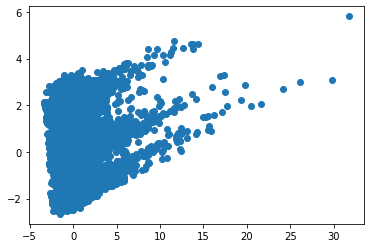

In [ ]:
plt.scatter(components[:,0], components[:,1])

In [ ]:
pca.explained_variance_ratio_

array([0.30193672, 0.19738014])

In [ ]:
pca.singular_values_

array([236.94263338, 191.57417801])

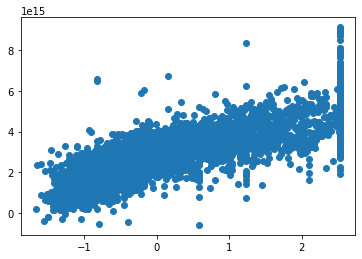

In [ ]:
plt.scatter(Y_test, y_preds)

In [ ]:
mean_absolute_percentage_error(Y_test, y_preds)

1.499885346818277e+16

In [ ]:
mean_squared_error(Y_test, y_preds)

9.066301542455272e+30

In [ ]:
r2_score(Y_test, y_preds)

-9.113716199949048e+30